# Data Wrangling Project - WeRateDogs

## Summary
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#gather">Gathering Data</a></li>
    <li><a href="#assess">Assessing Data</a></li>
    <li><a href="#clean">Cleaning Data</a></li>
    <li><a href="#store">Storing Data</a></li>
    <li><a href="#analyze_visualize">Analyzing and Visualizing Data</a></li>
    <li>Reporting
        <ul>
            <li><a href="./wrangle_report.html">Wrangle Report</a></li>
            <li><a href="./act_report.html">Act Report</a></li>
        </ul>
    </li>
</ul>

<a id="intro"></a>
## Introduction

Using Python and its libraries, I will gather data from some sources and formats, assess its quality and tidiness, then clean it. All the process will be documented in here and plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that will be gathered and anlyzed is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for us, students, to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

### The Goal

Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations

### The Data

In this projetct, I will work with three datasets:

1. <b>Enhanced Twitter Archive:</b> 
    - The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text.
2. <b>Additional Data via the Twitter API: **</b>
    - Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But with the WeRateDogs Twitter archive and specifically the tweet IDs within it, it's possible to gather this data for all 5000+.
    - <b>_** With the recent changes on Twitter API, for the fisrt submission of this project, I will follow the [Udacity Recomendations](https://knowledge.udacity.com/questions/855395) and use the JSON provided by Udacity. After the submit, I intend to try develop the same or better results following the extraction with the API._</b>
3. <b>Image Predictions File</b>:
    -  table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
    
    
<a id="gather"></a>
## Gathering Data

- Enhanced Twitter Archive was downloaded manually;
- Additional Data via the Twitter API was downloaded manually for now;
- Image Predictions File was downloaded following the code below.

In [1]:
# import tweepy
import requests
import json
import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
url_tsv_file = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

>The instructions were to download the tsv file using requests. But I would prefer do it using pandas, I think could be easiar. So I put the pandas version on the comment below and follow the instructions 
>
>`pd.read_csv(url_tsv_file, sep='\t').to_csv('image-predictions.tsv', sep = '\t')`

In [3]:
response = requests.get(url_tsv_file).content.decode('utf-8')
with open("image-predictions.tsv", 'w', encoding = 'utf-8') as file:
    file.write(response)
    file.close()

<a id="assess"></a>
## Assessing Data

Assessing visually and programmatically the three tables, I looked for Quality and Tidiness issues. <a href="#issues">Click Here</a> to see the issues.
> <b>Quality:</b> Low quality data is commonly referred to as dirty data. Dirty data has issues with its content. The Data Quality Dimensions are Completeness, Validity, Accuracy and Consistency.
>
> <b>Tidiness:</b> Untidy data is commonly referred to as “messy” data. Messy data has issues with its structure. Tidy data is where:
>1. Each variable forms a column.
>2. Each observation forms a row.
>3. Each type of observational unit forms a table.

In [4]:
# Loading the table "Enhanced Twitter Archive"
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Loading the table "Additional Data via the Twitter API"
df_json = pd.read_json('tweet-json.json', lines=True)

In [6]:
# Loading the table "Image Predictions File"
df_img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

### Visually

> Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.

In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
df_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Programmatically

In [10]:
# Checking the tweets that are not about dogs

df_not_dogs = df_img_pred.query('not p1_dog and not p2_dog and not p3_dog')[['tweet_id', 'jpg_url']]
print(df_not_dogs.shape[0])
df_not_dogs.sample(5)

324


,tweet_id,jpg_url
253,670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg
1141,729838605770891264,https://pbs.twimg.com/ext_tw_video_thumb/72983...
660,682406705142087680,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg
1143,730196704625098752,https://pbs.twimg.com/media/CiIuBwCUgAAAGbz.jpg
455,674767892831932416,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg


In [11]:
# Checking the number of images that was duplicated

df_img_pred.jpg_url.duplicated().sum()

66

In [12]:
df_img_pred.jpg_url.value_counts()

https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg                       

In [13]:
df_img_pred[df_img_pred.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [14]:
df_img_pred[df_img_pred.jpg_url == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


In [15]:
df_archive[df_archive.tweet_id.isin([754874841593970688, 679158373988876288])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None


In [16]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [18]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [21]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# Getting the main extracted name of dogs.

df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [23]:
# Checking a sample registers where the name extracted was "a" 
for txt in df_archive.query('name == "a"').head().text:
    print(txt)

Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R


In [24]:
df_json.extended_entities.isna().sum()

281

In [25]:
df_archive.rating_denominator

0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2356, dtype: int64

In [26]:
# Getting the text of register where the denominator it's different of 10

for txt in df_archive.query('rating_denominator != 10').sample(5).text:
    print(txt)

Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw


In [27]:
df_img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [28]:
# Checking a register that I found on my first search above.
df_archive[df_archive.text.str.contains('This is Bluebert. He just saw that both #FinalFur match ups are split 50/50.')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [29]:
# Getting the text from some registers where the denominator it's lower than 10

for txt in df_archive[df_archive.rating_denominator < 10].text:
    print(txt)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [30]:
# Checking a register that I found on my first search above.

df_archive[df_archive.text.str.contains('Keep Sam smiling by clicking and sharing this link:')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [31]:
for txt in df_archive[df_archive.text.str.contains(r'(\d+\.\d*\/\d+)')].text:
    print(txt)

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


/tmp/ipykernel_111097/1892289186.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  for txt in df_archive[df_archive.text.str.contains(r'(\d+\.\d*\/\d+)')].text:


In [32]:
df_archive[df_archive.text.str.contains(r'(\d+\.\d*\/\d+)')]

/tmp/ipykernel_111097/3250880235.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_archive[df_archive.text.str.contains(r'(\d+\.\d*\/\d+)')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


<a id="issues"></a>

### Issues

#### Quality
1. On `Image Predictions File`, there is 324 tweets and images that are not about dogs. <a href="#q1">Here</a>
2. On `Image Predictions File`, the dog breed that was predicted it's joined by an underscore. <a href="#q2">Here</a>
3. On `Additional Data via the Twitter API`, there is some retweets. <a href="#q3">Here</a>
4. On `Additional Data via the Twitter API`, there is incompability on some `id` and `id_str` fields. <a href="#q4">Here</a>
5. On `Additional Data via the Twitter API`, the column `geo` and `coordinates` doesn't have any information. <a href="#q5">Here</a>
6. On `Enhanced Twitter Archive` there is some registers where in the place of the name of the dog was extracted some misleaded word. By the sample, could be replaced by `NaN`. <a href="#q6">Here</a>
7. On `Enhanced Twitter Archive` there is some ratings that got wrongly extracted as on `twitter_id` 716439118184652801, 810984652412424192 or 883482846933004288 (three different cases of wrongly extraction) <a href="#q7">Here</a>
8. On `Enhanced Twitter Archive` where the denominator ratings are different than 10, usually there are more than one dog being rated. And checking visually the images, usually the denominator it's given summerizing 10 times the number of dogs in the picture. So where the denominator is 110, there is 11 dogs. <a href="#q8">Here</a>

#### Tidiness
1. On `Additional Data via the Twitter API` the column `display_text_range` contains two info that can be displayed into two columns. <a href="#t1">Here</a>
2. On `Enhanced Twitter Archive` fields `doggo`, `floofer`, `pupper` and `puppo` could be just one column <a href="#t2">Here</a>
3. The information it's spread across many places. Can be merged into one table. <a href="#t3">Here</a>

<a id="clean"></a>

## Cleaning Data

In [33]:
# Copying data

df_archive_copy = df_archive.copy()
df_json_copy = df_json.copy()
df_img_pred_copy = df_img_pred.copy()

In [34]:
def extract_rating(text):
    '''
    @param text: the text with the rating to get extracted
    @return: if find for than 1 pattern, return the last result, else return the match
    '''
    matches = re.findall(r"(\d[+\.\d]*\/\d+)", text, re.DOTALL)
    if len(matches) > 1:
        return matches[-1]
    return matches[0]

In [35]:
def get_type_dog(types):
    '''
    @param types: array with all the columns values from 'doggo', 'floofer', 'pupper', 'puppo'
    @return: the value of dog_type to input in just one column
    '''
    if all(types == 'None'):
        return np.nan
    return ','.join(list(filter(lambda x: x != 'None', types)))

In [36]:
def normalize_rating(numerator, denominator):
    '''
    @param numerator: the numerator of the rating to be normalizad
    @param denominator: the denominator of the rating to be normalized
    @return: the rating normalized
    '''
    coeff = denominator // 10
    return numerator / coeff

In [37]:
def set_dog_prediction(data):
    '''
    @param data: all the columns of the dataframe.
    @return: the first choosed breed by the algorithm that is a dog.
    '''
    dog = ''
    if data['p1_dog']:
        dog = data['p1']
    
    if data['p2_dog']:
        dog = data['p2']
    
    if data['p3_dog']:
        dog = data['p3']
        
    return ' '.join(dog.split('_')).title()

### Image Predictions File

<a id="q1"></a>
#### Issue: Q1. On Image Predictions File, there is 324 tweets and images that are not about dogs.</b>
    
#### Solution

In [38]:
# Getting the tweets id where are not about dogs

tweet_not_dogs = df_not_dogs.tweet_id

In [39]:
# Filtering the data that it's not dogs

df_img_pred_clean = df_img_pred_copy.query('tweet_id not in (@tweet_not_dogs)').copy()

#### Test

In [40]:
assert df_img_pred_clean.query('tweet_id in (@tweet_not_dogs)').shape[0] == 0

<a id="q2"></a>
#### Issue: Q2. On Image Predictions File, the dog breed that was predicted it's joined by an underscore.
    
#### Solution

In [41]:
# Setting the dog breed by the algorithm
df_img_pred_clean['dog_breed_predicted'] = df_img_pred_clean.apply(lambda x: set_dog_prediction(x), axis=1)

#### Test

In [42]:
assert len(df_img_pred_clean[df_img_pred_clean.dog_breed_predicted.str.contains('_')]) == 0

#### Other Cleanings

In [43]:
# Droping columns that will not be used
img_pred_columns = ['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']

df_img_pred_clean = df_img_pred_clean.drop(img_pred_columns, axis=1)

In [44]:
df_img_pred_clean.head()

,tweet_id,jpg_url,img_num,dog_breed_predicted
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Shetland Sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Rhodesian Ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,Bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Miniature Pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Doberman


### Additional Data via the Twitter API

<a id="q3"></a>
#### Issue: Q3. On Additional Data via the Twitter API, there is some retweets.
    
#### Solution

In [45]:
# Filtering data where is not retweet

retweet_ids = df_json_copy[df_json_copy.retweeted_status.notna()].index
df_json_clean = df_json_copy.drop(retweet_ids)

#### Test

In [46]:
# Testing the filterr
assert df_json_clean[~df_json_clean.retweeted_status.isna()].shape[0] == 0

<a id="t1"></a>
#### Issue: T1. On Additional Data via the Twitter API the column display_text_range contains two info that can be displayed into two columns.

#### Solution

In [47]:
# Getting the length of the tweet

df_json_clean['tweet_start'] = df_json_clean.display_text_range.map(lambda x: x[0])
df_json_clean['tweet_end'] = df_json_clean.display_text_range.map(lambda x: x[1])

#### Test

In [48]:
assert df_json_clean.tweet_start.value_counts().sum() == len(df_json_clean)
assert df_json_clean.tweet_end.value_counts().sum() == len(df_json_clean)

<a id="q4"></a>
#### Issue: Q4. On Additional Data via the Twitter API, there is incompability on some id and id_str fields

<a id="q5"></a>
#### Issue: Q5. On Additional Data via the Twitter API, the column geo and coordinates doesn't have any information. 
    
#### Solution

In [49]:
# Droppinng useless columns

json_columns = ['id_str', 'in_reply_to_status_id', 'in_reply_to_status_id_str',
                'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
                'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweeted_status',
                'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
                'user', 'truncated', 'entities', 'source', 'possibly_sensitive_appealable',
                'possibly_sensitive', 'extended_entities', 'full_text', 'display_text_range', 
               ]

df_json_clean.drop(json_columns, axis=1, inplace=True)

#### Other Cleanings

In [50]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2175 non-null   datetime64[ns, UTC]
 1   id              2175 non-null   int64              
 2   retweet_count   2175 non-null   int64              
 3   favorite_count  2175 non-null   int64              
 4   favorited       2175 non-null   bool               
 5   retweeted       2175 non-null   bool               
 6   lang            2175 non-null   object             
 7   tweet_start     2175 non-null   int64              
 8   tweet_end       2175 non-null   int64              
dtypes: bool(2), datetime64[ns, UTC](1), int64(5), object(1)
memory usage: 140.2+ KB


In [51]:
# Correcting the columns types

df_json_clean['lang'] = df_json_clean.lang.astype('category')

In [52]:
# Correcting the name of the column to standardize

df_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [53]:
df_json_clean.head()

,created_at,tweet_id,retweet_count,favorite_count,favorited,retweeted,lang,tweet_start,tweet_end
0,2017-08-01 16:23:56+00:00,892420643555336193,8853,39467,False,False,en,0,85
1,2017-08-01 00:17:27+00:00,892177421306343426,6514,33819,False,False,en,0,138
2,2017-07-31 00:18:03+00:00,891815181378084864,4328,25461,False,False,en,0,121
3,2017-07-30 15:58:51+00:00,891689557279858688,8964,42908,False,False,en,0,79
4,2017-07-29 16:00:24+00:00,891327558926688256,9774,41048,False,False,en,0,138


### Enhance'd Twitter Archive

In [54]:
df_archive_clean = df_archive_copy.query('tweet_id not in (@retweet_ids)')

<a id="q6"></a>
#### Issue: Q6. On Enhanced Twitter Archive there is some registers where in the place of the name of the dog was extracted some misleaded word. By the sample, could be replaced by NaN

#### Solution

In [55]:
# Replacing the values with np.nan

df_archive_clean['name'] = df_archive_clean.name.map(lambda x: np.nan if re.match('[a-z]+', x) or x == 'None' else x)

#### Test

In [56]:
assert len(df_archive_clean[df_archive_clean.name.notna() & df_archive_clean.name.str.match('[a-z]+')]) == 0

<a id="q7"></a>
#### Issue: Q7. On Enhanced Twitter Archive there is some ratings that got wrongly extracted as on twitter_id 716439118184652801, 810984652412424192 or 883482846933004288 (three different cases of wrongly extraction) Here

In [57]:
# Correctly extracting the ratings

rating = df_archive_clean.text.map(lambda x: extract_rating(x)).str.split('/', expand=True)

df_archive_clean['rating_numerator'] = rating[0].astype(float)
df_archive_clean['rating_denominator'] = rating[1].astype(float)

In [58]:
# Dropping rows that aren't rates

rows_to_drop = df_archive_clean[df_archive_clean.rating_denominator % 10 != 0].index

df_archive_clean.drop(rows_to_drop, inplace=True)

#### Test

In [59]:
# Testing if there is some row that it's not a rate
assert df_archive_clean[df_archive_clean.rating_denominator % 10 != 0].shape[0] == 0

<a id="q8"></a>

#### Issue: Q8. On Enhanced Twitter Archive where the denominator ratings are different than 10, usually there are more than one dog being rated. And checking visually the images, usually the denominator it's given summerizing 10 times the number of dogs in the picture. So where the denominator is 110, there is 11 dogs.

#### Solution

In [60]:
# Normalizing the numerator

df_archive_clean['rate'] = df_archive_clean[['rating_numerator', 'rating_denominator']]\
                                        .apply(lambda x: normalize_rating(x['rating_numerator'], x['rating_denominator']), axis=1)

In [61]:
df_archive_clean = df_archive_clean.query('rate > 0')

#### Test

In [62]:
assert len(df_archive_clean.query('rating_denominator != (rating_numerator / rate * 10) ')) == 0

<a id="t2"></a>

#### Issue: T2. On Enhanced Twitter Archive fields doggo, floofer, pupper and puppo could be just one column.

#### Solution

In [63]:
# Transforming the columns 'doggo', 'floofer', 'pupper', 'puppo' in just one called dog_type

df_archive_clean['dog_type'] = df_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: get_type_dog(x), axis=1)

#### Test

In [64]:
df_archive_clean.dog_type.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

#### Other Cleanings

In [65]:
# Droppinng useless columns

archive_columns = ['source', 'in_reply_to_status_id',
                   'in_reply_to_user_id', 'retweeted_status_id',
                   'retweeted_status_user_id', 'retweeted_status_timestamp', 
                   'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo',
                   'rating_denominator', 'rating_numerator', 'timestamp'
                  ]

df_archive_clean.drop(archive_columns, axis=1, inplace=True)

In [66]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2351 non-null   int64  
 1   text      2351 non-null   object 
 2   name      1501 non-null   object 
 3   rate      2351 non-null   float64
 4   dog_type  380 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 110.2+ KB


In [67]:
# Correcting the columns types

df_archive_clean['dog_type'] = df_archive_clean.dog_type.astype("category")

In [68]:
df_archive_clean.head()

,tweet_id,text,name,rate,dog_type
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,13.0,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,13.0,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,13.0,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,12.0,NaN


### Joining the tables

<a id="t3"></a>

#### Issue: T3. The information it's spread across many places. Can be merged into one table.

#### Solution

In [69]:
df_merged = df_archive_clean.merge(df_json_clean, how='inner', on=['tweet_id'])

In [70]:
df_merged = df_merged.merge(df_img_pred_clean, how='inner', on=['tweet_id'])

In [71]:
df_merged.head()

,tweet_id,text,name,rate,dog_type,created_at,retweet_count,favorite_count,favorited,retweeted,lang,tweet_start,tweet_end,jpg_url,img_num,dog_breed_predicted
0,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,13.0,NaN,2017-08-01 00:17:27+00:00,6514,33819,False,False,en,0,138,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Papillon
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,12.0,NaN,2017-07-31 00:18:03+00:00,4328,25461,False,False,en,0,121,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Kelpie
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,13.0,NaN,2017-07-30 15:58:51+00:00,8964,42908,False,False,en,0,79,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever
3,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,12.0,NaN,2017-07-29 16:00:24+00:00,9774,41048,False,False,en,0,138,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,German Short-Haired Pointer
4,891087950875897856,Here we have a majestic great white breaching ...,NaN,13.0,NaN,2017-07-29 00:08:17+00:00,3261,20562,False,False,en,0,138,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Irish Terrier


<a id="store"></a>

## Storing Data

In [72]:
df_merged.to_csv('twitter_archive_master.csv', index=False)

<a id="analyze_visualize"></a>

## Analyzing and Visualizing Data

### First Insight

In [73]:
# For visualizing purposes, I created this columnn

df_merged['year'] = df_merged.created_at.dt.year

In [74]:
df_merged.created_at.min(), df_merged.created_at.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 00:17:27+0000', tz='UTC'))

In [75]:
# Creating a metric dataframe for first insight

df_agg_metrics = df_merged.groupby('year').agg({
    'retweet_count': 'sum',
    'favorite_count': 'sum',
    'tweet_id': 'count'
}).reset_index()

df_agg_metrics.rename(columns={
    'retweet_count': 'total_abs_retweet',
    'favorite_count': 'total_abs_favorite',
    'tweet_id': 'total_tweets'
}, inplace=True)

# Creting proportional metrics, since the tweets per year it's not the same
# On the final report, my considerations will be said about the min and max date from the dataset
df_agg_metrics['total_prop_retweet'] = df_agg_metrics.total_abs_retweet / df_agg_metrics.total_tweets
df_agg_metrics['total_prop_favorite'] = df_agg_metrics.total_abs_favorite / df_agg_metrics.total_tweets
df_agg_metrics

,year,total_abs_retweet,total_abs_favorite,total_tweets,total_prop_retweet,total_prop_favorite
0,2015,574525,1345911,515,1115.582524,2613.419417
1,2016,2256964,6488586,849,2658.379270,7642.621908
2,2017,1913074,7702025,320,5978.356250,24068.828125


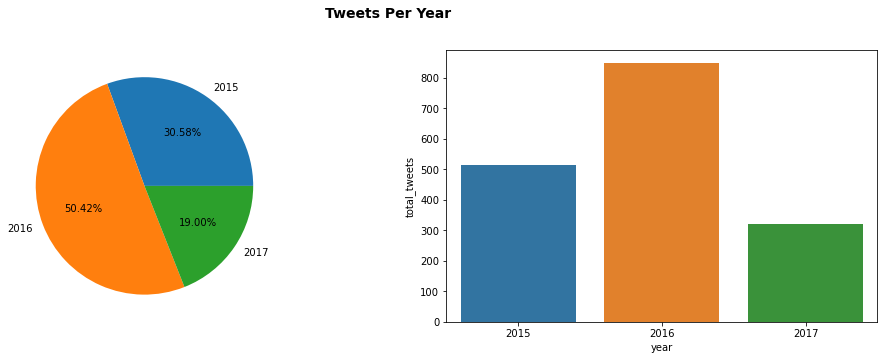

In [76]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5), )

axs[0].pie(df_agg_metrics.total_tweets, labels = df_agg_metrics.year, autopct='%1.2f%%');
sns.barplot(x='year', y='total_tweets', data=df_agg_metrics, ax=axs[1]);

plt.suptitle(f"Tweets Per Year", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

axs[0].set(ylabel='')

plt.show()


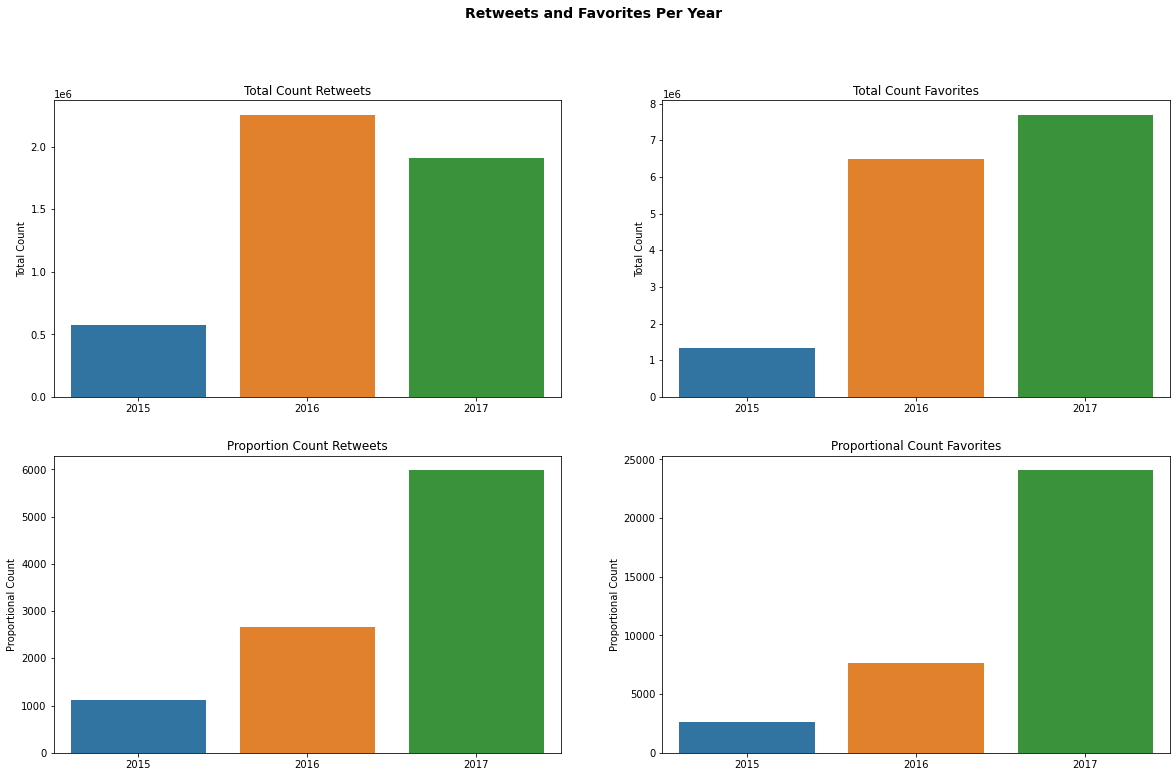

In [77]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 12), )

sns.barplot(x='year', y='total_abs_retweet', data=df_agg_metrics, ax=axs[0][0]);
sns.barplot(x='year', y='total_abs_favorite', data=df_agg_metrics, ax=axs[0][1]);

sns.barplot(x='year', y='total_prop_retweet', data=df_agg_metrics, ax=axs[1][0]);
sns.barplot(x='year', y='total_prop_favorite', data=df_agg_metrics, ax=axs[1][1]);

plt.suptitle(f"Retweets and Favorites Per Year", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')


axs[0][0].set(ylabel='Total Count', xlabel='', title='Total Count Retweets')
axs[0][1].set(ylabel='Total Count', xlabel='', title='Total Count Favorites')

axs[1][0].set(ylabel='Proportional Count', xlabel='', title='Proportion Count Retweets')
axs[1][1].set(ylabel='Proportional Count', xlabel='', title='Proportional Count Favorites')

plt.show()

### Second Insight

In [78]:
df_merged.dog_breed_predicted.value_counts()[:10]

Labrador Retriever    97
Chihuahua             68
Golden Retriever      67
Kelpie                39
Eskimo Dog            39
Pomeranian            39
Chow                  36
Cocker Spaniel        35
Toy Poodle            35
French Bulldog        34
Name: dog_breed_predicted, dtype: int64

In [79]:
df_merged.shape

(1684, 17)

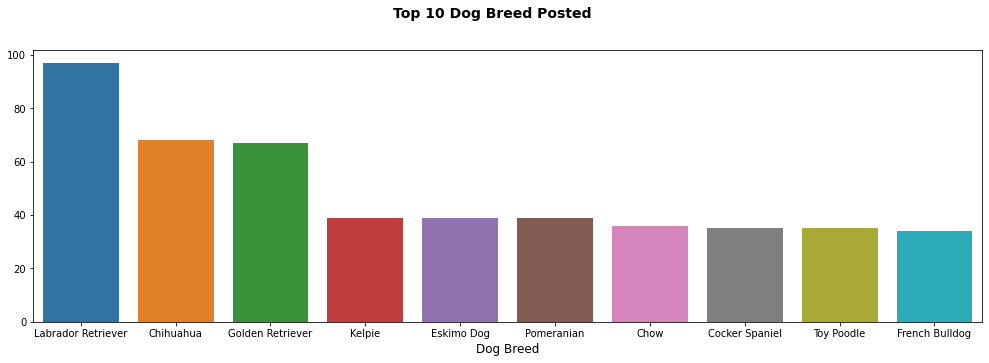

In [80]:
fig = plt.figure( figsize=(17, 5), )

posts_dogs = df_merged.dog_breed_predicted.value_counts().reset_index()

sns.barplot(x='index', y='dog_breed_predicted', data=posts_dogs[:10])

plt.xlabel('Dog Breed', fontsize=12)
plt.ylabel('')
plt.suptitle(f"Top 10 Dog Breed Posted", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')


plt.show()

### Third Insight

In [81]:
df_dog_breeds = df_merged.groupby('dog_breed_predicted').agg({
    'retweet_count': 'sum',
    'favorite_count': 'sum',
    'tweet_id': 'count',
    'rate': 'sum'
}).reset_index()

# As same on the first insight, I created proportionl values, since there is more metrics for some 
# dog breeds than others.
df_dog_breeds['prop_retweet'] = df_dog_breeds.retweet_count / df_dog_breeds.tweet_id
df_dog_breeds['prop_favorite'] = df_dog_breeds.favorite_count / df_dog_breeds.tweet_id
df_dog_breeds['prop_rating'] = df_dog_breeds.rate / df_dog_breeds.tweet_id
df_dog_breeds.head()

,dog_breed_predicted,retweet_count,favorite_count,tweet_id,rate,prop_retweet,prop_favorite,prop_rating
0,Affenpinscher,1226,5094,1,10.0,1226.000000,5094.000000,10.000000
1,Afghan Hound,2931,6952,4,39.0,732.750000,1738.000000,9.750000
2,Airedale,24128,80299,12,131.0,2010.666667,6691.583333,10.916667
3,American Staffordshire Terrier,39643,172950,25,264.0,1585.720000,6918.000000,10.560000
4,Appenzeller,13379,55062,11,127.0,1216.272727,5005.636364,11.545455


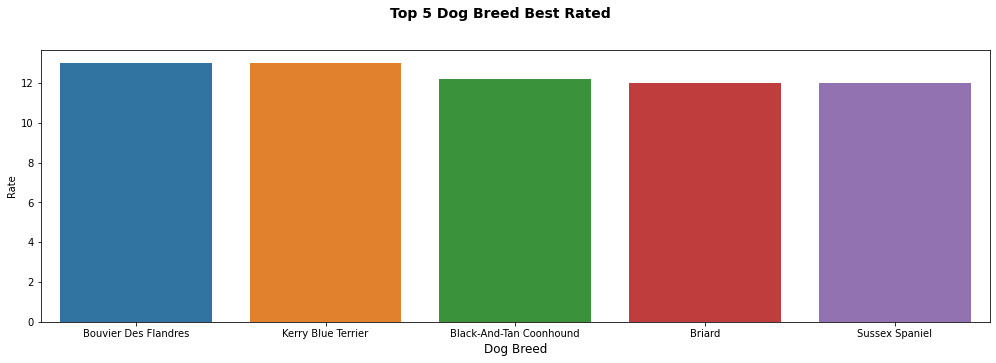

In [82]:
fig = plt.figure( figsize=(17, 5), )

top_rating = df_dog_breeds.sort_values(['prop_rating', 'prop_favorite', 'prop_retweet'], ascending=False)[:5]

sns.barplot(x='dog_breed_predicted', y='prop_rating', data=top_rating)

plt.xlabel('Dog Breed', fontsize=12)
plt.ylabel('Rate')
plt.suptitle(f"Top 5 Dog Breed Best Rated", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')



plt.show()

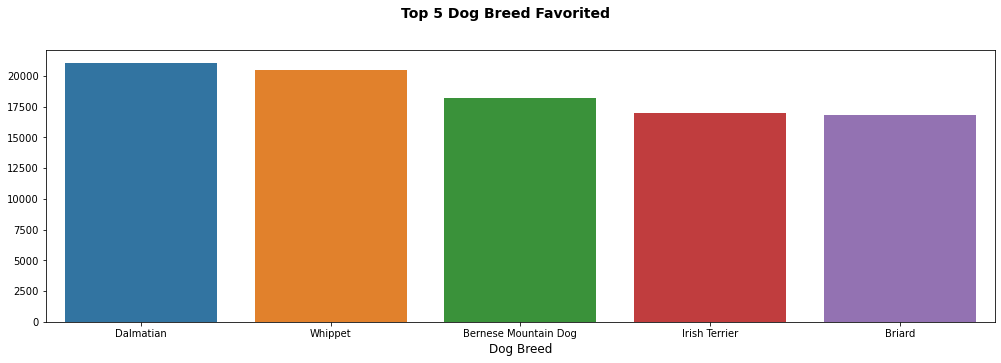

In [83]:
fig = plt.figure( figsize=(17, 5), )

top_favorite = df_dog_breeds.sort_values(['prop_favorite'], ascending=False)[:5]

sns.barplot(x='dog_breed_predicted', y='prop_favorite', data=top_favorite)

plt.xlabel('Dog Breed', fontsize=12)
plt.ylabel('')
plt.suptitle(f"Top 5 Dog Breed Favorited", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')


plt.show()

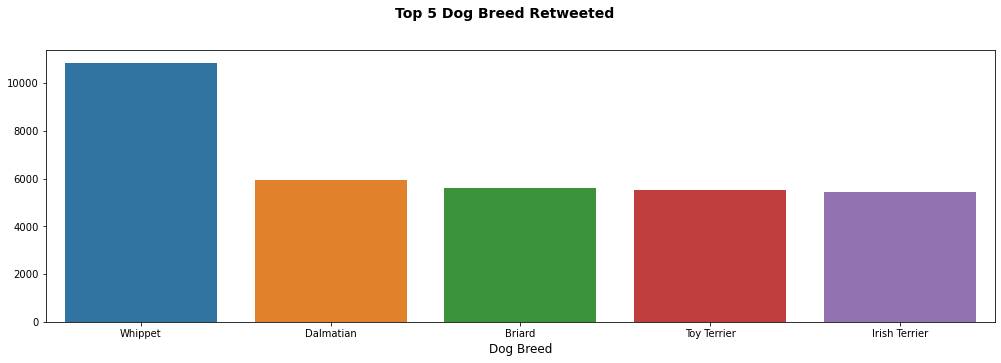

In [84]:
fig = plt.figure( figsize=(17, 5), )

top_retweeted = df_dog_breeds.sort_values(['prop_retweet'], ascending=False)[:5]

sns.barplot(x='dog_breed_predicted', y='prop_retweet', data=top_retweeted)

plt.xlabel('Dog Breed', fontsize=12)
plt.ylabel('')
plt.suptitle(f"Top 5 Dog Breed Retweeted", 
             horizontalalignment='center', verticalalignment='center', 
             fontweight='bold', fontsize='14')

plt.show()